# code starts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
import scipy
import argparse
import math
from PIL import Image
import sys
import time

In [2]:
sys.path.append('/usr/local/lib/python2.7/dist-packages') # site-packages
# Make sure that caffe is on the python path:
caffe_root = '/home/lezhi/SegNet-Tutorial/caffe-segnet/'
sys.path.insert(0, caffe_root + 'python')
import caffe

In [3]:
# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = '/home/lezhi/SegNet-Tutorial/Example_Models/segnet_model_driving_webdemo.prototxt'
PRETRAINED = '/home/lezhi/SegNet-Tutorial/Example_Models/segnet_weights_driving_webdemo.caffemodel'
IMAGE_FILE = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/img2/singapore/1.274876,103.797064455_0.png'# 1.274876,103.797064455_0 

In [4]:
caffe.set_mode_cpu()
net = caffe.Net(MODEL_FILE,
                PRETRAINED,
                caffe.TEST)

In [5]:
input_shape = net.blobs['data'].data.shape
output_shape = net.blobs['argmax'].data.shape

# looping through directories

In [6]:
import IPython.core.display as dp
rootdir = '/media/senseable-beast/beast-brain-1/Data/streetviewdata'

In [ ]:
citynames = sorted([d for d in os.listdir(os.path.join(rootdir, "img2")) if os.path.isdir(os.path.join(rootdir, "img2"))])
for cityname in citynames[1:]:    ############################################# only testing 3 cities now
    citypath = os.path.join(rootdir, "img2", cityname)
    
    tgt_citypath = os.path.join(rootdir, "img", cityname)
    if not os.path.exists(tgt_citypath):
        os.makedirs(tgt_citypath)
        
    imgnames = sorted([f for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
    count = 0
    
    for imgname in imgnames[654:]: ############################################# only testing 10 images now
        count +=1
        IMAGE_FILE = os.path.join(os.path.join(citypath, imgname))
        
        dp.clear_output(wait=True)
        print "Evaluating:", cityname,"\t", count, "/", len(imgnames), "images", imgname
        sys.stdout.flush()
        
        img_file = caffe.io.load_image(IMAGE_FILE)
        img_file = caffe.io.resize_image(img_file, (input_shape[2],input_shape[3]))   ############# switched 2 and 3        
        img_file=(255*img_file).astype(np.uint8)
        
        input_image = img_file.transpose((2,0,1))
        input_image = input_image[(2,1,0),:,:]
        input_image = np.asarray([input_image])
        
        out = net.forward_all(data=input_image)
        
        ind = np.squeeze(net.blobs['argmax'].data).astype(np.uint8)        
        ind = np.array([(j+243) for j in np.nditer(ind)]).reshape(360,480)
        
        output_img = np.zeros((360,480,4)).astype(np.uint8) 
        output_img[:,:,:3] = img_file
        output_img[:,:,3] = ind
        
        img = Image.fromarray(output_img, mode='RGBA')
        img.save(os.path.join(tgt_citypath, imgname))
        

Evaluating: hongkong 	8 / 7606 images 22.262156,114.179041698_1.png


## savetxt (deprecated)

In [ ]:
citynames = sorted([d for d in os.listdir(os.path.join(rootdir, "img2")) if os.path.isdir(os.path.join(rootdir, "img2"))])
for cityname in citynames[1:]:    ############################################# only testing 3 cities now
    citypath = os.path.join(rootdir, "img2", cityname)
    
    cityindpath = os.path.join(rootdir, "ind", cityname)
    if not os.path.exists(cityindpath):
        os.makedirs(cityindpath)
        
    imgnames = sorted([f for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
    count = 0
    #all_ind = np.zeros((len(imgnames), input_shape[2]*input_shape[3]))
    for imgname in imgnames[4088:]: ############################################# only testing 10 images now
        count +=1
        IMAGE_FILE = os.path.join(os.path.join(citypath, imgname))
        
        dp.clear_output(wait=True)
        print "Evaluating:", cityname,"\t", count, "/", len(imgnames), "images", imgname
        sys.stdout.flush()
        
        input_image = caffe.io.load_image(IMAGE_FILE)
        input_image = caffe.io.resize_image(input_image, (input_shape[2],input_shape[3]))   ############# switched 2 and 3
        
        input_image = input_image.transpose((2,0,1))
        input_image = input_image[(2,1,0),:,:]
        input_image = np.asarray([input_image])
        input_image=np.around(255*input_image)
        
        out = net.forward_all(data=input_image)
        
        segmentation_ind = np.squeeze(net.blobs['argmax'].data).astype(int)
        
        np.savetxt(os.path.join(cityindpath, imgname[:-4]+'.txt'), segmentation_ind, fmt='%i')
        

Evaluating: boston 	2 / 12253 images 42.337631,-71.0648264032_2.png


# single image segmentation test

In [4]:
Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement, Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])
labels = ["Sky", "Building", "Pole", "Road", \
        "Pavement", "Tree", "SignSymbol", "Fence", \
        "Car", "Pedestrian", "Bicyclist", "Unlabelled"]

In [8]:
input_shape

(1, 3, 360, 480)

(420, 600, 3)


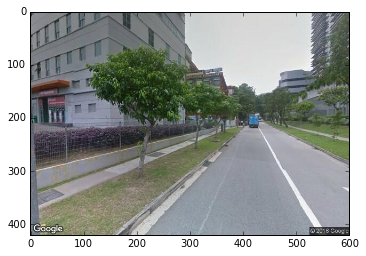

In [11]:
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)
print input_image.shape

(360, 480, 3)


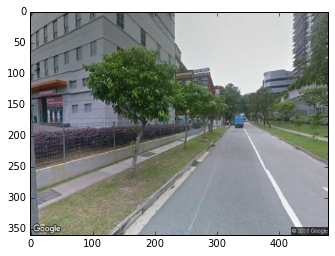

In [12]:
input_image = caffe.io.resize_image(input_image, (input_shape[2],input_shape[3]))   ############# switched 2 and 3
plt.imshow(input_image)
print input_image.shape

In [13]:
input_image = input_image.transpose((2,0,1))
input_image = input_image[(2,1,0),:,:]
input_image = np.asarray([input_image])


In [14]:
input_image=(255*input_image).astype(np.uint8)
input_image

array([[[[137, 124, 143, ...,  89, 101, 111],
         [134, 126, 135, ...,  86,  89,  89],
         [141, 124, 131, ...,  88,  82,  76],
         ..., 
         [132, 132, 133, ...,  54,  53,  54],
         [134, 134, 134, ...,  54,  53,  54],
         [137, 136, 135, ...,  54,  53,  54]],

        [[133, 120, 139, ..., 100, 112, 122],
         [130, 122, 131, ...,  98, 101, 101],
         [137, 120, 127, ..., 101,  95,  89],
         ..., 
         [123, 123, 124, ...,  49,  48,  49],
         [125, 125, 125, ...,  49,  48,  49],
         [128, 127, 126, ...,  49,  48,  49]],

        [[132, 119, 138, ...,  92, 104, 114],
         [129, 121, 130, ...,  90,  93,  93],
         [136, 119, 126, ...,  93,  87,  81],
         ..., 
         [110, 110, 111, ...,  50,  49,  50],
         [111, 111, 111, ...,  50,  49,  50],
         [114, 113, 112, ...,  50,  49,  50]]]], dtype=uint8)

In [15]:
out = net.forward_all(data=input_image)

In [16]:
print net.blobs['argmax'].data.shape

segmentation_ind = np.squeeze(net.blobs['argmax'].data)
print segmentation_ind.shape

segmentation_ind_3ch = np.resize(segmentation_ind,(3,input_shape[2],input_shape[3])) 
print segmentation_ind_3ch.shape

segmentation_ind_3ch = segmentation_ind_3ch.transpose(1,2,0).astype(np.uint8)
print segmentation_ind_3ch.shape

segmentation_rgb = np.zeros(segmentation_ind_3ch.shape, dtype=np.uint8)
print segmentation_rgb.shape

(1, 1, 360, 480)
(360, 480)
(3, 360, 480)
(360, 480, 3)
(360, 480, 3)


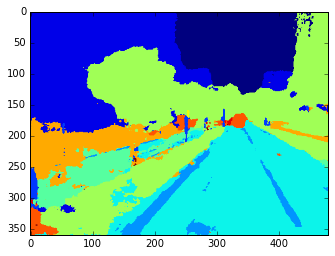

In [17]:
plt.imshow(segmentation_ind)

In [18]:
segmentation_ind

array([[ 1.,  1.,  1., ...,  6.,  6.,  6.],
       [ 1.,  1.,  1., ...,  6.,  6.,  6.],
       [ 1.,  1.,  1., ...,  6.,  6.,  6.],
       ..., 
       [ 9.,  9.,  9., ...,  4.,  4.,  4.],
       [ 9.,  9.,  9., ...,  4.,  4.,  4.],
       [ 4.,  9.,  9., ...,  4.,  4.,  4.]], dtype=float32)

In [19]:
sg_id_flat = segmentation_ind.reshape((1,segmentation_ind.shape[0]*segmentation_ind.shape[1])).astype(int)
sg_rgb_flat = np.array([label_colours[i] for i in sg_id_flat])
sg_rgb = sg_rgb_flat.reshape(segmentation_ind_3ch.shape)

sg_rgb

array([[[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ..., 
        [192, 128, 128],
        [192, 128, 128],
        [192, 128, 128]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ..., 
        [192, 128, 128],
        [192, 128, 128],
        [192, 128, 128]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ..., 
        [192, 128, 128],
        [192, 128, 128],
        [192, 128, 128]],

       ..., 
       [[ 64,  64,   0],
        [ 64,  64,   0],
        [ 64,  64,   0],
        ..., 
        [ 60,  40, 222],
        [ 60,  40, 222],
        [ 60,  40, 222]],

       [[ 64,  64,   0],
        [ 64,  64,   0],
        [ 64,  64,   0],
        ..., 
        [ 60,  40, 222],
        [ 60,  40, 222],
        [ 60,  40, 222]],

       [[ 60,  40, 222],
        [ 64,  64,   0],
        [ 64,  64,   0],
        ..., 
        [ 60,  40, 222],
        [ 60,  40, 222],
        [ 60,  40,

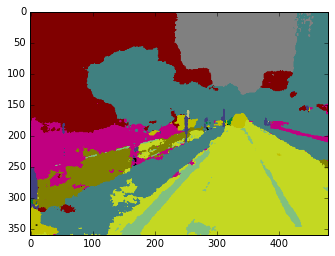

In [20]:
plt.imshow(sg_rgb)